<a href="https://colab.research.google.com/github/chanakatb/pytorch_deep_learning/blob/main/Create_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Deep Learning with PyTorch 5**

**Create a Basic Neural Network Model**

In [268]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [269]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer 1 (number of neurons) -->
  # Hidden Layer 2 (number of neurons) -->
  # Output (3 classes of Iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [270]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()



## **Deep Learning with PyTorch 6**

In [271]:
import pandas as pd # to load data
import matplotlib.pyplot as plt
%matplotlib inline

In [272]:

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url) # data frame
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [273]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [274]:
# Train Test Splits! set X and y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [275]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


In [278]:
if isinstance(X_train, np.ndarray):
    print("X_train is a NumPy array.")
else:
    print("X_train is not a NumPy array.")

if isinstance(X_train, torch.Tensor):
    print("X_train is a PyTorch tensor.")
else:
    print("X_train is not a PyTorch tensor.")


X_train is a NumPy array.
X_train is not a PyTorch tensor.


In [279]:
# Convet X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [280]:
# Convet y labels to float tensors
# LongTensor is 64 bit integers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [281]:
if isinstance(X_train, np.ndarray):
    print("X_train is a NumPy array.")
else:
    print("X_train is not a NumPy array.")

if isinstance(X_train, torch.Tensor):
    print("X_train is a PyTorch tensor.")
else:
    print("X_train is not a PyTorch tensor.")

X_train is not a NumPy array.
X_train is a PyTorch tensor.


In [282]:
# Set the criterion of model to measure the error, how far off the predications are from data
criterion = nn.CrossEntropyLoss()
# Choose Optimizer, lr = learning rate(if error doesn't go down after a bunch of interations (epochs), lower our learning rate)
# Adam optimizer is the popular one
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [283]:
# Model parameters
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]], requires_grad=True)
Parameter containing:
tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626],
       requires_grad=True)
Parameter containing:
tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
        [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
        [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
        [ 0.1133, -0.3520,  0.0632, -0.0472,  0.2579, -0.1034,  0.3086,  0.1093],
        [-0.3185,  0.0744, -0.0807,  0.1770, -0.3035, -0.0259,  0.2337,  0.1253],
        [ 0.1664,  0.2993, 

In [284]:
# Train our model
# Epochs - one run through all the training data in our network
epochs = 100
losses = []

for i  in range(epochs):
  # Go forward and get prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/ error
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the network to find tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162348866462708
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003390073776245
Epoch: 50 and loss: 0.2679471969604492
Epoch: 60 and loss: 0.1796349734067917
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651433467865
Epoch: 90 and loss: 0.06522615998983383


Text(0.5, 0, 'epoch')

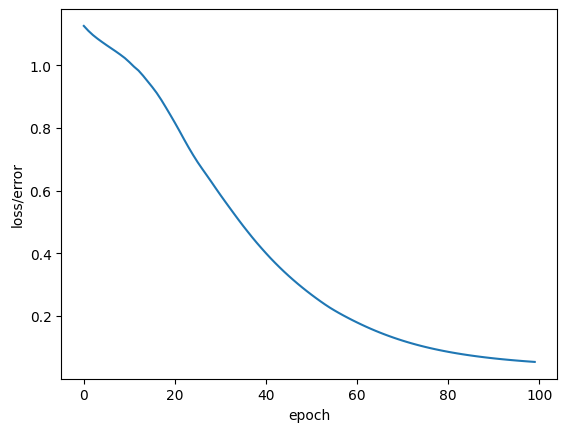

In [285]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

## **Deep Learning with PyTorch 7**